# Klasifikasi Gejala Migrain dengan Metode Machine Learning dan SMOTE

### Dataset  
Sumber: https://www.kaggle.com/datasets/gzdekzlkaya/migraine-symptom-dataset-for-classification/

## Instalasi Dependencies

In [1]:
!pip uninstall numpy -y
!pip uninstall pandas -y
!pip uninstall scipy -y
!pip uninstall scikit-learn -y
!pip uninstall imbalanced-learn -y
!pip uninstall joblib -y
!pip uninstall threadpoolctl -y

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Found existing installation: joblib 1.5.2
Uninstalling joblib-1.5.2:
  Successfully uninstalled joblib-1.5.2
Found existing installation: threadpoolctl 3.6.0
Uninstalling threadpoolctl-3.6.0:
  Successfully uninstalled threadpoolctl-3.6.0


In [2]:
pip install numpy==1.24.3 pandas==1.5.3 scipy==1.10.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 matplotlib seaborn

  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl.metadata (58 kB)
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ----- ---------------------------------- 1/7 [numpy]
   ----- -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Import Library

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Load Dataset

In [4]:
df = pd.read_csv("migraine_symptom_classification.csv")
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [5]:
print("Ukuran dataset:", df.shape)
print("\nInformasi dataset:")
df.info()

print("\nCek missing value:")
df.isnull().sum()

Ukuran dataset: (400, 24)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-nul

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [6]:
print("Distribusi kelas (Type):")
display(df['Type'].value_counts(normalize=True).mul(100).round(2))

Distribusi kelas (Type):


Typical aura with migraine       61.75
Migraine without aura            15.00
Familial hemiplegic migraine      6.00
Typical aura without migraine     5.00
Basilar-type aura                 4.50
Other                             4.25
Sporadic hemiplegic migraine      3.50
Name: Type, dtype: float64

## Exploratory Data Analysis (EDA)

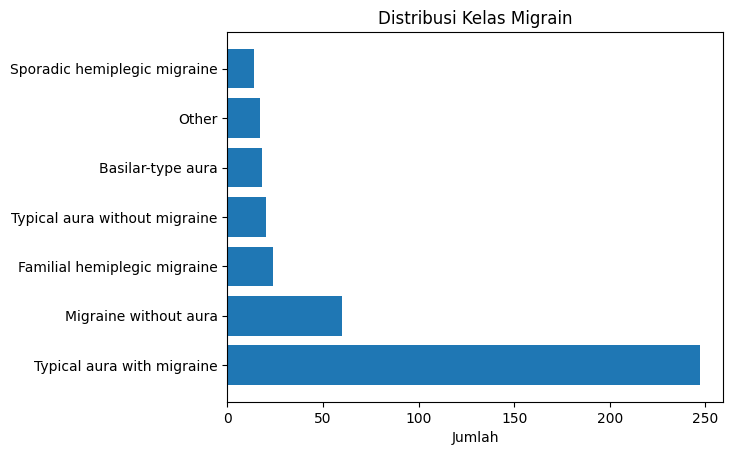

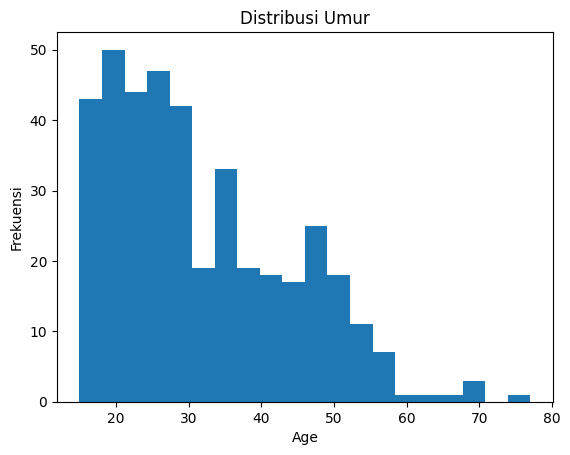

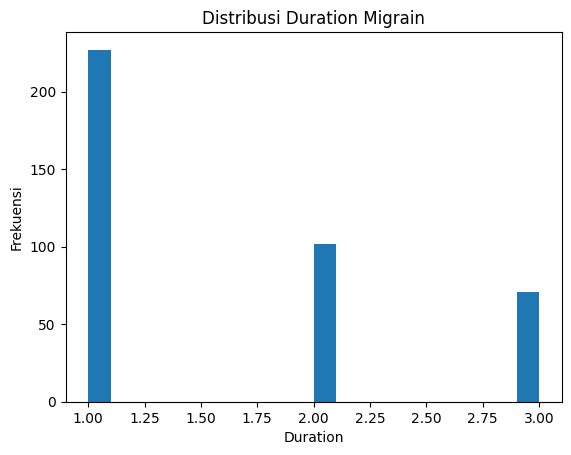

In [7]:
# Distribusi kelas
plt.figure()
class_counts = df['Type'].value_counts()
plt.barh(class_counts.index, class_counts.values)
plt.xlabel("Jumlah")
plt.title("Distribusi Kelas Migrain")
plt.show()

# Histogram Age
if "Age" in df.columns:
    plt.figure()
    plt.hist(df['Age'], bins=20)
    plt.title("Distribusi Umur")
    plt.xlabel("Age")
    plt.ylabel("Frekuensi")
    plt.show()

# Histogram Duration
if "Duration" in df.columns:
    plt.figure()
    plt.hist(df['Duration'], bins=20)
    plt.title("Distribusi Duration Migrain")
    plt.xlabel("Duration")
    plt.ylabel("Frekuensi")
    plt.show()

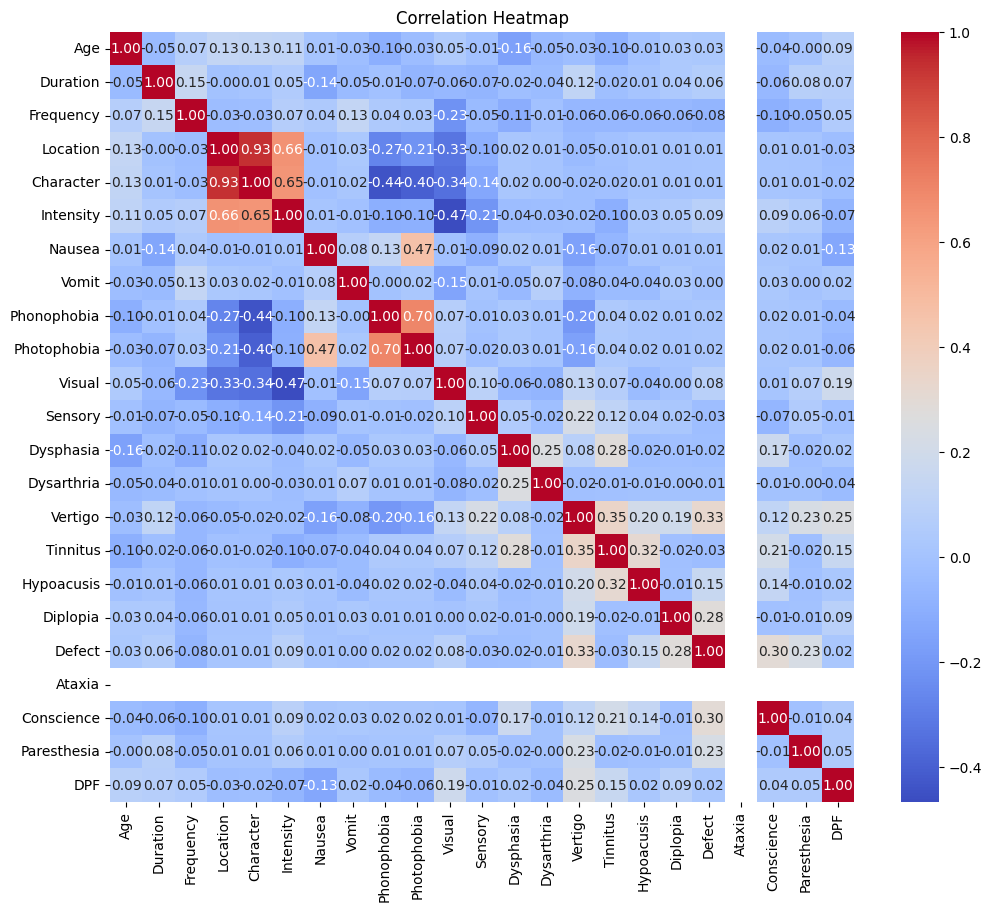

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Label Encoding

In [9]:
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

# cek mapping
print("label-> angka:")
for i, cls in enumerate(le.classes_):
    print(i, ":", cls)

label-> angka:
0 : Basilar-type aura
1 : Familial hemiplegic migraine
2 : Migraine without aura
3 : Other
4 : Sporadic hemiplegic migraine
5 : Typical aura with migraine
6 : Typical aura without migraine


## Train–Test Split + Scaling

In [10]:
X = df.drop(['Type', 'Type_encoded'], axis=1)
y = df['Type_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
pipelines = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', random_state=42))
    ]),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

## Baseline (Tanpa SMOTE)

In [12]:
print("\n Baseline Evaluation (No SMOTE) ")

baseline_results = {}
baseline_predictions = {}

for name, model in pipelines.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    baseline_results[name] = acc
    baseline_predictions[name] = y_pred
    
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


 Baseline Evaluation (No SMOTE) 

=== Naive Bayes ===
Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         5
           4       0.43      0.75      0.55         4
           5       0.96      0.95      0.95        74
           6       1.00      1.00      1.00         6

    accuracy                           0.93       120
   macro avg       0.89      0.89      0.88       120
weighted avg       0.95      0.93      0.94       120


Confusion Matrix:
[[ 5  1  0  0  0  0  0]
 [ 0  5  0  0  0  2  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  3  1  0]
 [ 0  0  0  0  4 70  0]
 [ 0  0  0  0  0  0  6]]

=== Decision Tree ===
Accuracy: 0.8333333333333334

Classification Report:
              precision    reca

## Evaluasi Model dengan 5-Fold Cross Validation

In [13]:
print("\n=== 5-Fold Cross Validation Score ===")
for name, model in pipelines.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: {scores.mean():.4f}")


=== 5-Fold Cross Validation Score ===
Naive Bayes: 0.8821
Decision Tree: 0.8607
KNN: 0.8357
SVM: 0.8893
Random Forest: 0.8857
XGBoost: 0.8964


## SMOTE

### Mengapa perlu SMOTE?

Dataset migrain memiliki distribusi kelas yang tidak seimbang (imbalanced data),  
di mana kelas tertentu memiliki jumlah sampel jauh lebih sedikit dibanding kelas lain.

Ketidakseimbangan ini menimbulkan masalah:
- Model cenderung bias memprediksi kelas mayoritas
- Akurasi tampak tinggi tetapi F1 rendah pada kelas minoritas
- Kesalahan diagnosis klinis berpotensi besar

Untuk itu digunakan SMOTE (Synthetic Minority Oversampling Technique),  
yang membuat sampel sintetis baru pada kelas minoritas sehingga distribusi kelas menjadi seimbang.

Tujuan SMOTE:
1. Mengurangi bias model
2. Meningkatkan kemampuan generalisasi
3. Memperbaiki kemampuan model mengenali tipe migrain langka

Setelah penerapan SMOTE, performa model dibandingkan dengan kondisi baseline yang tidak menggunakan SMOTE.


In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)

print("Before:", Counter(y_train))

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("After:", Counter(y_train_smote))

Before: Counter({5: 173, 2: 42, 1: 17, 6: 14, 3: 12, 0: 12, 4: 10})
After: Counter({4: 173, 5: 173, 3: 173, 6: 173, 2: 173, 0: 173, 1: 173})


In [15]:
print("\n=== Evaluation After SMOTE ===")

smote_results = {}
smote_predictions = {}

for name, model in pipelines.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    smote_results[name] = acc
    smote_predictions[name] = y_pred
    
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


=== Evaluation After SMOTE ===

=== Naive Bayes ===
Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.42      0.71      0.53         7
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         5
           4       0.27      1.00      0.42         4
           5       0.97      0.77      0.86        74
           6       1.00      1.00      1.00         6

    accuracy                           0.83       120
   macro avg       0.81      0.90      0.82       120
weighted avg       0.92      0.83      0.86       120


Confusion Matrix:
[[ 5  1  0  0  0  0  0]
 [ 0  5  0  0  0  2  0]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  6  0  0 11 57  0]
 [ 0  0  0  0  0  0  6]]

=== Decision Tree ===
Accuracy: 0.775

Classification Report:
              precision    recall  f1-score   

In [16]:
# result_smote
results_smote = {}
for name, model in pipelines.items():
    model.fit(X_train_smote, y_train_smote)
    pred = model.predict(X_test)
    results_smote[name] = accuracy_score(y_test, pred)
    
results_smote

{'Naive Bayes': 0.8333333333333334,
 'Decision Tree': 0.775,
 'KNN': 0.7166666666666667,
 'SVM': 0.7916666666666666,
 'Random Forest': 0.825,
 'XGBoost': 0.8416666666666667}

In [17]:
# result_baseline
results = {}
for name, model in pipelines.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, pred)
    
results

{'Naive Bayes': 0.9333333333333333,
 'Decision Tree': 0.8333333333333334,
 'KNN': 0.9083333333333333,
 'SVM': 0.9,
 'Random Forest': 0.9,
 'XGBoost': 0.8833333333333333}

In [18]:
print("\n=== 5-Fold Cross Validation (After SMOTE) ===")
for name, model in pipelines.items():
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
    print(f"{name}: {scores.mean():.4f}")


=== 5-Fold Cross Validation (After SMOTE) ===
Naive Bayes: 0.8117
Decision Tree: 0.9439
KNN: 0.9026
SVM: 0.9084
Random Forest: 0.9670
XGBoost: 0.9604


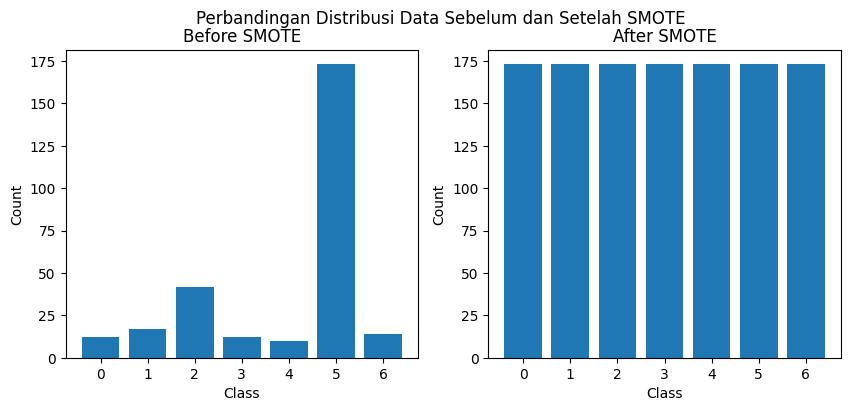

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("Before SMOTE")
plt.bar(Counter(y_train).keys(), Counter(y_train).values())
plt.xlabel("Class"); plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("After SMOTE")
plt.bar(Counter(y_train_smote).keys(), Counter(y_train_smote).values())
plt.xlabel("Class"); plt.ylabel("Count")

plt.suptitle("Perbandingan Distribusi Data Sebelum dan Setelah SMOTE")
plt.show()

## Hyperparameter Tuning (SVM, RF, XGB)

In [20]:
# svm
params_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf']
}

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

grid_svm = GridSearchCV(svm_pipe, params_svm, cv=5)
grid_svm.fit(X_train_smote, y_train_smote)

print("Best SVM:", grid_svm.best_params_)
print("SVM Acc:", grid_svm.best_score_)

# rf
params_rf = {
    'n_estimators':[50,100,200],
    'max_depth':[3,5,10,None]
}
grid_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv=5)
grid_rf.fit(X_train_smote, y_train_smote)
print("Best RF:", grid_rf.best_params_)
print("RF Acc:", grid_rf.best_score_)

#xgb
params_xgb = {
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.3],
    'n_estimators':[50,100,200]
}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), params_xgb, cv=5)
grid_xgb.fit(X_train_smote, y_train_smote)
print("Best XGB:", grid_xgb.best_params_)
print("XGB Acc:", grid_xgb.best_score_)

Best SVM: {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
SVM Acc: 0.9183212597354011
Best RF: {'max_depth': None, 'n_estimators': 200}
RF Acc: 0.966989762949359
Best XGB: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
XGB Acc: 0.9620378872904126


## Perbandingan Baseline vs SMOTE

In [21]:
comparison = pd.DataFrame({
    "Baseline (No SMOTE)": results,
    "After SMOTE": results_smote
})
print(comparison)

               Baseline (No SMOTE)  After SMOTE
Naive Bayes               0.933333     0.833333
Decision Tree             0.833333     0.775000
KNN                       0.908333     0.716667
SVM                       0.900000     0.791667
Random Forest             0.900000     0.825000
XGBoost                   0.883333     0.841667


## Confusion Matrix Model Terbaik

<Figure size 600x500 with 0 Axes>

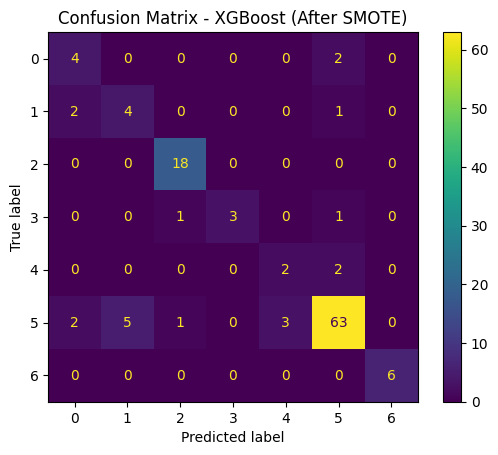

In [22]:
best_xgb = grid_xgb.best_estimator_
best_xgb.fit(X_train_smote, y_train_smote)
y_pred_best = best_xgb.predict(X_test)

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title("Confusion Matrix - XGBoost (After SMOTE)")
plt.show()

## Feature Importance


=== Feature Importance (Random Forest) ===
Age : 0.1621
Intensity : 0.1278
Visual : 0.1128
DPF : 0.0944
Character : 0.0804
Frequency : 0.0800
Phonophobia : 0.0759
Location : 0.0565
Vertigo : 0.0553
Photophobia : 0.0433
Duration : 0.0264
Sensory : 0.0237
Vomit : 0.0205
Tinnitus : 0.0112
Conscience : 0.0089
Dysphasia : 0.0068
Defect : 0.0044
Hypoacusis : 0.0042
Nausea : 0.0035
Diplopia : 0.0016
Paresthesia : 0.0004
Ataxia : 0.0000
Dysarthria : 0.0000


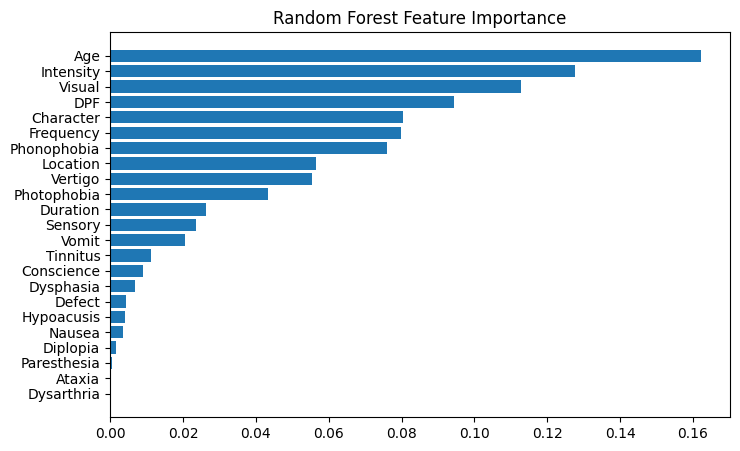


=== Feature Importance (XGBoost) ===
Location : 0.2906
Phonophobia : 0.2737
DPF : 0.0778
Nausea : 0.0657
Vertigo : 0.0451
Character : 0.0441
Visual : 0.0327
Conscience : 0.0300
Intensity : 0.0285
Photophobia : 0.0270
Tinnitus : 0.0213
Frequency : 0.0174
Dysphasia : 0.0148
Age : 0.0114
Sensory : 0.0060
Hypoacusis : 0.0058
Vomit : 0.0042
Duration : 0.0041
Paresthesia : 0.0000
Dysarthria : 0.0000
Diplopia : 0.0000
Defect : 0.0000
Ataxia : 0.0000


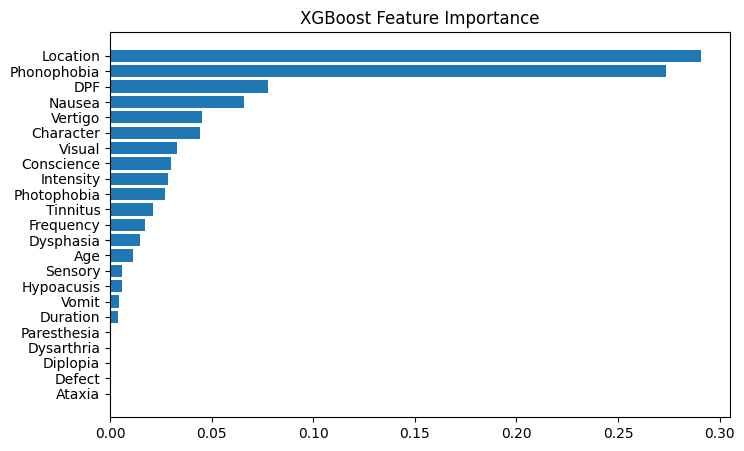

In [23]:
feature_names = X.columns

# rf Feature Importance
rf_model = grid_rf.best_estimator_
rf_importances = rf_model.feature_importances_

rf_sorted_idx = np.argsort(rf_importances)[::-1]

print("\n=== Feature Importance (Random Forest) ===")
for idx in rf_sorted_idx:
    print(f"{feature_names[idx]} : {rf_importances[idx]:.4f}")

plt.figure(figsize=(8,5))
plt.barh(feature_names[rf_sorted_idx], rf_importances[rf_sorted_idx])
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


# xgboost Feature Importance
xgb_model = grid_xgb.best_estimator_
xgb_importances = xgb_model.feature_importances_

xgb_sorted_idx = np.argsort(xgb_importances)[::-1]

print("\n=== Feature Importance (XGBoost) ===")
for idx in xgb_sorted_idx:
    print(f"{feature_names[idx]} : {xgb_importances[idx]:.4f}")

plt.figure(figsize=(8,5))
plt.barh(feature_names[xgb_sorted_idx], xgb_importances[xgb_sorted_idx])
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()
